Importing necessary libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


In [7]:
df=pd.read_csv("C:/Users/Svea/.vscode/AI_projects/co2emissions/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Exploring important features

In [13]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Plotting these feature's histograms

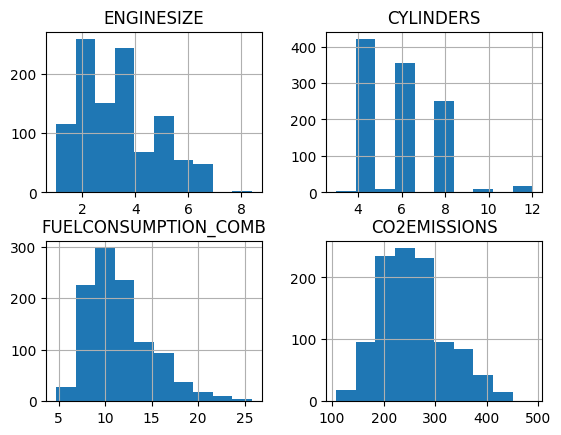

In [14]:
cdf.hist()
plt.show()

Now, plotting these features against CO2EMISSIONS to see how linear their relationship is.

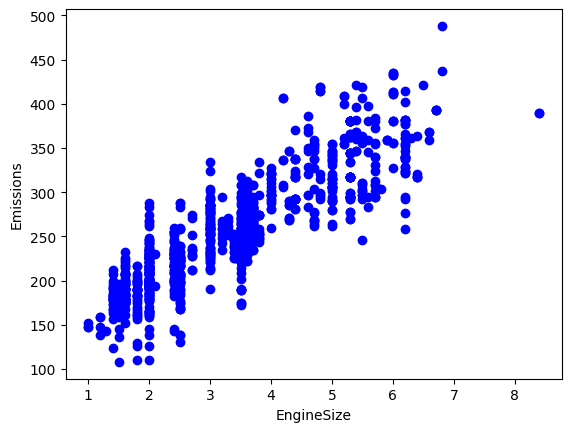

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("EngineSize")
plt.ylabel("Emissions")
plt.show()

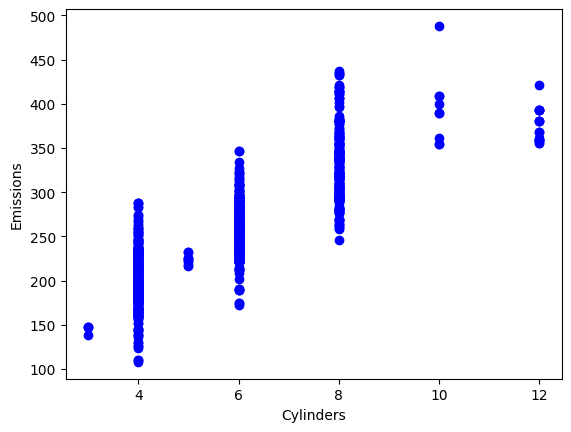

In [16]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

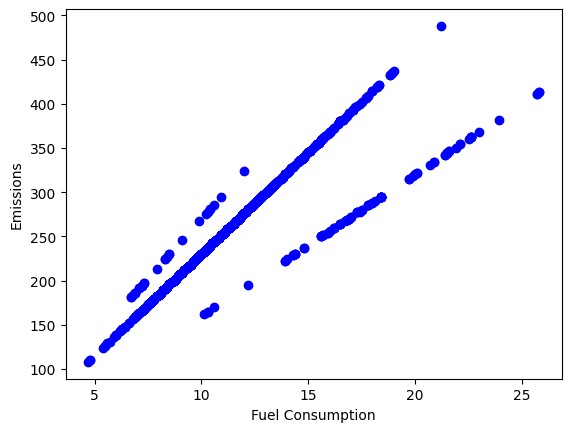

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emissions")
plt.show()

Creating train and test dataset

In [18]:
mask=np.random.rand(len(df)) < 0.8
train=cdf[mask]
test=cdf[~mask]

Plotting training data

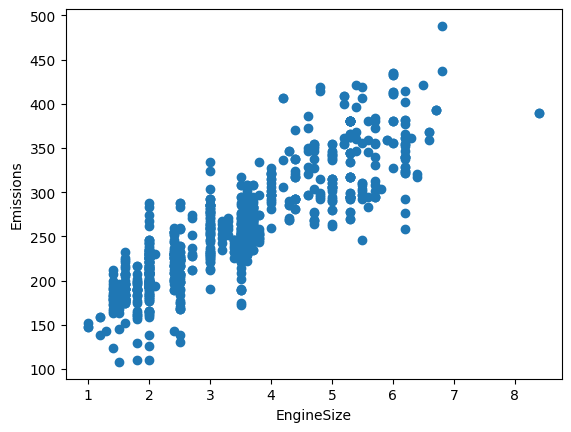

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("EngineSize")
plt.ylabel("Emissions")
plt.show()

Building Simple Linear Regression Model

In [20]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

# printing coefficients

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.81842237]]
Intercept:  [126.42884745]


Plotting the fit line over our data

Text(0, 0.5, 'Emissions')

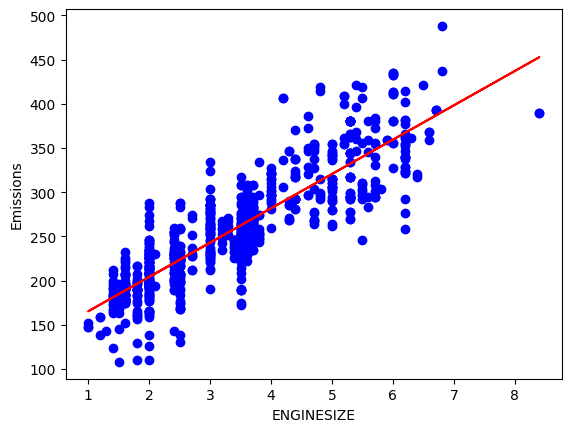

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emissions')

Text(0, 0.5, 'Emissions')

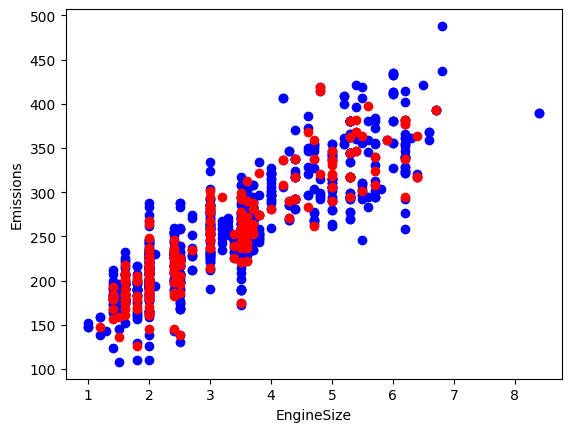

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel('EngineSize')
plt.ylabel('Emissions')

In [25]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_predict = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_predict))

Mean absolute error: 21.74
Residual sum of squares (MSE): 848.93
R2-score: 0.79
